<a href="https://colab.research.google.com/github/Sarang-Khonde/aai/blob/main/BLockProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial state and Goal state:


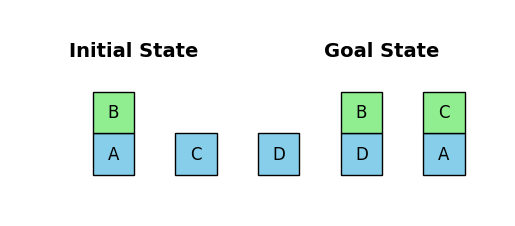

Executing: PICKUP(C)
Executing: PUTDOWN(C)
Executing: UNSTACK(B,A)
Executing: PUTDOWN(B)
Executing: PICKUP(C)
Executing: STACK(C,A)
Executing: PICKUP(B)
Executing: STACK(B,D)


In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Visualize Blocks World (initial and goal states)
class BlocksWorldVisualizer:

    def __init__(self, world_state, goal_state=None):
        self.world_state = world_state
        self.goal_state = goal_state
        self.fig, self.ax = plt.subplots()

    def draw(self):
        self.ax.clear()

        # Set the limits of the plot to accommodate both initial and goal state visualizations
        self.ax.set_xlim(-2, 10)
        self.ax.set_ylim(-1, 4)
        self.ax.set_aspect('equal', 'box')

        # Draw the initial world state on the left
        self.draw_state(self.world_state, offset=0, label="Initial State")

        # Draw the goal world state on the right (if given)
        if self.goal_state:
            self.draw_state(self.goal_state, offset=6, label="Goal State")

        self.ax.axis('off')  # Turn off the axes
        plt.show()

    def draw_state(self, world_state, offset, label):
        self.ax.text(offset + 1, 3, label, ha='center', va='center', fontsize=14, fontweight='bold')

        # Draw blocks on the table
        on_table = [pred.X for pred in world_state if isinstance(pred, ONTABLE)]
        for i, block in enumerate(on_table):
            self.ax.add_patch(patches.Rectangle((i * 2 + offset, 0), 1, 1, edgecolor="black", facecolor="skyblue"))
            self.ax.text(i * 2 + offset + 0.5, 0.5, block, color="black", ha="center", va="center", fontsize=12)

        # Draw stacked blocks
        on = [pred for pred in world_state if isinstance(pred, ON)]
        for pred in on:
            self.ax.add_patch(patches.Rectangle((on_table.index(pred.Y) * 2 + offset, 1), 1, 1, edgecolor="black", facecolor="lightgreen"))
            self.ax.text(on_table.index(pred.Y) * 2 + offset + 0.5, 1.5, pred.X, color="black", ha="center", va="center", fontsize=12)

        # Draw the agent's hand
        holding = [pred.X for pred in world_state if isinstance(pred, HOLDING)]
        for block in holding:
            self.ax.add_patch(patches.Circle((offset + 3, 2), 0.5, edgecolor="black", facecolor="orange"))
            self.ax.text(offset + 3, 2, block, color="black", ha="center", va="center", fontsize=12)

# Modified GoalStackPlanner with Graphical Output for both initial and goal states
class GoalStackPlannerWithVisualization(GoalStackPlanner):

    def __init__(self, initial_state, goal_state):
        super().__init__(initial_state, goal_state)
        self.visualizer = BlocksWorldVisualizer(initial_state, goal_state)

    def get_steps(self):
        steps = super().get_steps()  # Get the list of operations (steps)

        # Visualize the initial and goal state side by side
        print("Initial state and Goal state:")
        self.visualizer.draw()

        # Apply the steps and visualize after each step
        for step in steps:
            print(f"Executing: {step}")
            self.visualizer.world_state = self.apply_step(step)
            self.visualizer.draw()  # Show the updated world state

        return steps

    def apply_step(self, step):
        world_state = self.visualizer.world_state.copy()

        # Apply the action (update world state)
        for delete_pred in step.delete():
            if delete_pred in world_state:
                world_state.remove(delete_pred)
        for add_pred in step.add():
            if add_pred not in world_state:
                world_state.append(add_pred)

        return world_state


# Define the initial and goal states
initial_state = [
    ON('B', 'A'),
    ONTABLE('A'), ONTABLE('C'), ONTABLE('D'),
    CLEAR('B'), CLEAR('C'), CLEAR('D'),
    ARMEMPTY()
]

goal_state = [
    ON('B', 'D'), ON('C', 'A'),
    ONTABLE('D'), ONTABLE('A'),
    CLEAR('B'), CLEAR('C'),
    ARMEMPTY()
]

# Create GoalStackPlanner with Visualization
goal_stack = GoalStackPlannerWithVisualization(initial_state=initial_state, goal_state=goal_state)
steps = goal_stack.get_steps()


1.** Problem Setup:**
State Representation: Involves blocks that can be on top of other blocks, on
the table, or held by the robot arm.

**Actions**: Key actions include Pickup, Putdown, Stack, and Unstack.

2. **Predicates:**
ON(A, B): Block A is on top of block B.
ONTABLE(A): Block A is on the table.
CLEAR(A): Block A has no block on top of it.
HOLDING(A): The robot is holding block A.
ARMEMPTY: The robot's arm is empty.

3. **Goal State:**
The goal is to arrange the blocks in a specified configuration (e.g., one block on top of another or all blocks on the table).

4. **Search Space:**
The state space involves all possible configurations of blocks and robot actions.

5. **Solution Techniques:**
State-Space Search: Algorithms like BFS, DFS, and A* are commonly used to search for a path to the goal state.
STRIPS Representation: Actions are defined by preconditions, effects, and outcomes.

6. **Challenges:**
Complexity: The problem grows exponentially as the number of blocks increases.
Backtracking: Some actions may require backtracking to find the correct sequence.

7. **Applications:**
Used in AI planning, robotics, and puzzle-solving.
8. Extensions:
Multiple Arms: Multiple arms manipulating blocks.
Dynamic Obstacles: Obstacles that move and block actions.